# Notebook to compare different runs varying coupling constants
## Gather Plaquette, polyakov loop and Acceptance 
Author: Venkitesh Ayyar (vayyar@bu.edu) \
May 4, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import subprocess as sp
import os 
import glob
import pandas as pd
import itertools

In [3]:
# %matplotlib widget

In [4]:
%matplotlib notebook

### Gather observables

In [32]:
def f_gather_data(fname):
    
    # Get Plaquette values
    cmd="grep 'Plaq' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr1=np.array([[int(i.split('[ ')[-1].split(' ]')[0]), 
      np.float64(i.split(' ')[-1]),
      np.float64(i.split(': ')[2].split(' s')[0])] 
     for i in op])
    
    # Gather Polykov loop values
    cmd="grep 'Polyakov' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr2=np.array([complex(np.float64(i.split(' ')[-1][1:-1].split(',')[0]),
             np.float64(i.split(' ')[-1][1:-1].split(',')[1])) 
     for i in op ])
    
    ## Total time
    cmd="grep 'Total time for trajectory' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr3=[np.float32(i.split(': ')[-1]) for i in op]
    
    
    lgth=min(len(arr1),len(arr2),len(arr3))
#     print(lgth)

    ## Metropolis values
    cmd="grep 'Metropolis_test' %s"%(fname)
#     print(cmd)
    op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
    op=[i for i in op if i] # Drop null string
    # print(op[0])

    arr_temp=[1 if (i.split(' ')[-1]=='ACCEPTED') else 0 for i in op] # Accept =1 , Reject = 0
    skip=lgth-len(arr_temp)
#     print("skip",skip)
    arr_skip=[np.nan for i in range(skip)]
    arr4=np.array(arr_skip+arr_temp)

    
    ## Create dataframe
    cols=['iter','Plaquette','Polyakov','Traj_time','Accept','Plaq_epoch']
    df=pd.DataFrame(columns=cols)

    df['Plaquette']=arr1[:,1]
    df['Plaq_epoch']=arr1[:,2]
    df['iter']=arr1[:,0].astype(int)
    df['Polyakov']=arr2
    df['Traj_time']=arr3
    df['Accept']=arr4

    return df

In [38]:
dict_list=[]

df_combined=pd.DataFrame([])


top_dir='/usr/workspace/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/dm_tests/runs/'

flist=[]
for fldr in glob.glob(top_dir+'run_*'): 
    fname=fldr+'/SDM.4node'
    flist.append(fname)
    
    df=f_gather_data(fname)
    beta = fname.split('/')[-2].split('_')[1].split('-')[-1]
    mf   = fname.split('/')[-2].split('_')[2].split('-')[-1]
    dict1={'beta':beta, 'mf':mf, 'df':df}
#     print(dict1)
    dict_list.append(dict1)
    #     df_combined=pd.concat([df_combined,pd.DataFrame(dict1,index=[df_combined.shape[0]+1])])


In [40]:

dict_list[0]

{'beta': '9.0',
 'mf': '0.6443',
 'df':      iter  Plaquette            Polyakov  Traj_time  Accept   Plaq_epoch
 0       1   0.641557  0.130088+0.002285j    16.0469     NaN    22.822490
 1       2   0.576427  0.060509+0.003240j    13.9848     NaN    36.842450
 2       3   0.525865  0.023851+0.000348j    14.1322     NaN    50.233649
 3       4   0.485155  0.010027+0.005035j    14.3167     NaN    64.567648
 4       5   0.452933  0.007338+0.004308j    14.4271     NaN    79.121410
 ..    ...        ...                 ...        ...     ...          ...
 415   206   0.341669 -0.005717-0.001612j    14.5067     1.0  3006.194520
 416   207   0.340985 -0.000150+0.001228j    14.5252     1.0  3020.737071
 417   208   0.341391  0.000342-0.002129j    14.5393     1.0  3035.296719
 418   209   0.341047  0.000975-0.001773j    14.5194     1.0  3049.833519
 419   210   0.340598  0.002088-0.002353j    14.5424     1.0  3064.393170
 
 [420 rows x 6 columns]}

## Plot Plaquette

<IPython.core.display.Javascript object>


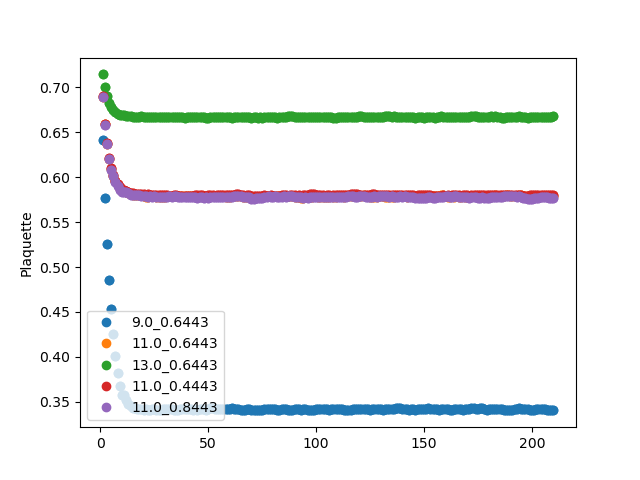

9.0_0.6443
11.0_0.6443
13.0_0.6443
11.0_0.4443
11.0_0.8443


In [44]:
plt.figure()

for i in dict_list:
    df=i['df']
    label=str(i['beta'])+'_'+str(i['mf'])
    print(label)
    x=df.iter.values
    y=df.Plaquette.values
    # y=df.Traj_time.values

    plt.plot(x,y,marker='o',linestyle='',label=label)
    
plt.legend(loc='best')
plt.ylabel('Plaquette')
plt.show()

### Plot Polyakov loop

<IPython.core.display.Javascript object>


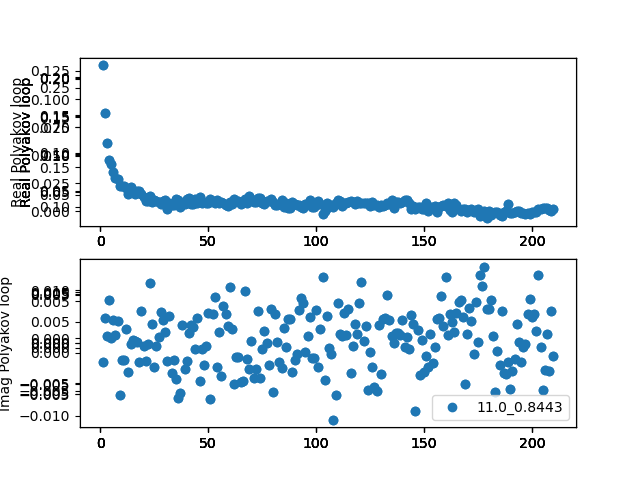

In [46]:
fig=plt.figure()



for i in dict_list:
    df=i['df']
    label=str(i['beta'])+'_'+str(i['mf'])
#     print(label)
    
    
    x=df.iter.values
    y=df.Polyakov.values
    fig.add_subplot(2,1,1)

    plt.plot(x,y.real,marker='o',linestyle='',label=label)
    plt.ylabel('Real Polyakov loop')

    fig.add_subplot(2,1,2)

    plt.plot(x,y.imag,marker='o',linestyle='',label=label)
    
plt.legend(loc='best')
plt.ylabel('Imag Polyakov loop')
plt.show()


<IPython.core.display.Javascript object>


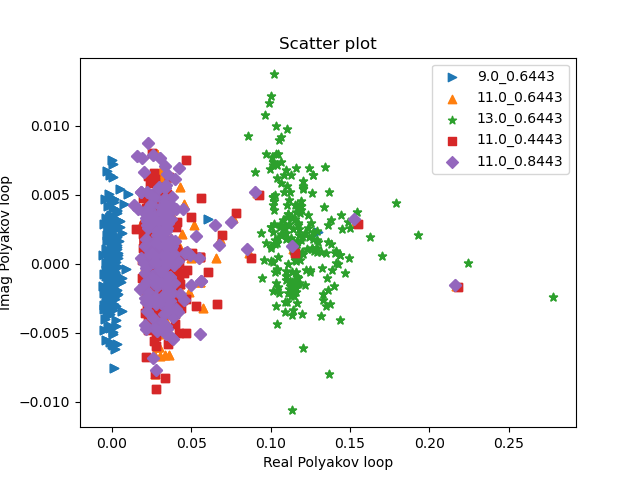

9.0_0.6443
11.0_0.6443
13.0_0.6443
11.0_0.4443
11.0_0.8443


In [52]:
fig=plt.figure()

for i,marker in zip(dict_list,itertools.cycle('>^*sDHPdpx_')):
    df=i['df']
    label=str(i['beta'])+'_'+str(i['mf'])
    print(label)

    x=df.iter.values
    y=df.Polyakov.values

    y1=y.real
    y2=y.imag

    plt.scatter(y1,y2,label=label,marker=marker)
    
plt.legend(loc='best')
plt.xlabel('Real Polyakov loop')
plt.ylabel('Imag Polyakov loop')
plt.title("Scatter plot")
plt.show()

### Plot acceptance

<IPython.core.display.Javascript object>


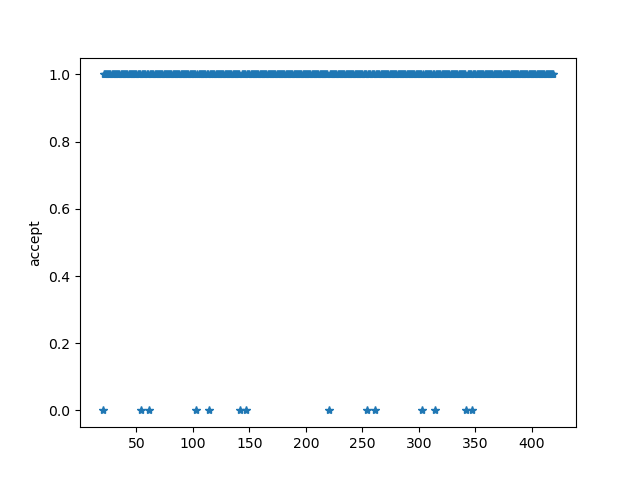

In [104]:
plt.figure()
x=df.iter.values
y=df.Accept.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [105]:
# Print Acceptance ratio
ct=df['Accept'].dropna().value_counts()
print(ct)

if len(ct)<2:
    print("Only one type",ct)
    pass 
elif len(ct)==2:     
    Act=ct[1]
    Rft=ct[0]
    print(Act* 100 /(Act+Rft),'%')

1.0    386
0.0     14
Name: Accept, dtype: int64
96.5 %
